## Imports

In [87]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_model import *
from matplotlib import gridspec
from utils.plot_helper import errorbar_plot
#plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/ggplot_sam.mplstyle')
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')

#plt.rc('markersize=3')
plt.rc('text', usetex=False)
#plt.rcParams['xtick.color'] = 'k'
#plt.rcParams['ytick.color'] = 'k'
#plt.rcParams['axes.labelcolor'] = 'k'
#plt.rcParams['text.usetex'] = False
%matplotlib notebook
#%matplotlib inline
%autoreload 2

In [78]:
import matplotlib as mpl

In [79]:
mpl.get_configdir()

'/Users/saforem2/.matplotlib'

In [29]:
plt.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

## Define data_dir and load data

In [249]:
run_dir = '../log_mog_tf/run_209/'
data_dir = run_dir + 'run_info/'
figs_dir = run_dir + 'figures1/'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [250]:
with open(data_dir + 'tunneling_rates.pkl', 'rb') as f:
    tunneling_rates = pickle.load(f)
with open(data_dir + 'acceptance_rates.pkl', 'rb') as f:
    acceptance_rates = pickle.load(f)
with open(data_dir + 'tunneling_rates_highT.pkl', 'rb') as f:
    tunneling_rates_highT = pickle.load(f)
with open(data_dir + 'acceptance_rates_highT.pkl', 'rb') as f:
    acceptance_rates_highT = pickle.load(f)
with open(data_dir + 'distances.pkl', 'rb') as f:
    distances = pickle.load(f)
with open(data_dir + 'distances_highT.pkl', 'rb') as f:
    distances_highT = pickle.load(f)

In [251]:
get_vals_as_arr = lambda _dict: np.array(list(_dict.values()))

tr0 = get_vals_as_arr(tunneling_rates)
tr1 = get_vals_as_arr(tunneling_rates_highT)

ar0 = get_vals_as_arr(acceptance_rates)
ar1 = get_vals_as_arr(acceptance_rates_highT)

d0 = get_vals_as_arr(distances)
d1 = get_vals_as_arr(distances_highT)

tunneling_rates_avg = tr0[:, 0]
tunneling_rates_err = tr0[:, 1]
tunneling_rates_avg_highT = tr1[:, 0]
tunneling_rates_err_highT = tr1[:, 1]

acceptance_rates_avg = ar0[:, 0]
acceptance_rates_err = ar0[:, 1]
acceptance_rates_avg_highT = ar1[:, 0]
acceptance_rates_err_highT = ar1[:, 1]

distances_avg = d0[:, 0]
distances_err = d0[:, 1]
distances_avg_highT = d1[:, 0]
distances_err_highT = d1[:, 1]

In [252]:
steps_arr = []
temp_arr = []
for key in tunneling_rates_highT.keys():
    steps_arr.append(key[0]+1)
    temp_arr.append(key[1])

In [253]:
x_steps = 3 * [steps_arr]
x_temps = 3 * [temp_arr]

y_data = [tr0[:, 0], ar0[:, 0], d0[:, 0]]
y_err = [tr0[:, 1], ar1[:, 1], d1[:, 1]]

y_data_highT = [tr1[:, 0], ar1[:, 0], d1[:, 0]]

y_err_highT = [tr1[:, 1], ar1[:, 1], d1[:, 1]]

str0 = (f"3 in 3 dims; ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}}),$'.format(0.05))
#  prefix = str0 + str1
title = str0 + str1 + r'$T_{trajectory} = 1$'
title_highT = str0 + str1 + r'$T_{trajectory} > 1$'
#  def out_file(f, s): return self.figs_dir + f'{f}_{s+1}.pdf'
def out_file(f): return figs_dir + f'{f}.pdf'

kwargs = {
    'x_label': 'Training step',
    'y_label': '',
    'legend_labels': ['Tunneling rate',
                      'Acceptance rate',
                      'Distance / step'],
    'title': title,
    'grid': True,
    'reverse_x': False,
}

<IPython.core.display.Javascript object>


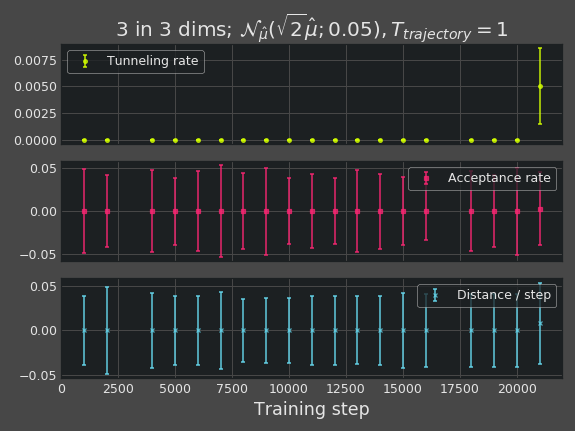

Saving figure to: ../log_mog_tf/run_209/figures1/tr_ar_dist_steps_lowT.pdf


In [254]:
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')
out_file0 = out_file('tr_ar_dist_steps_lowT')#, step)
fig, ax = errorbar_plot(x_steps, y_data, y_err, out_file=out_file0, **kwargs)

<IPython.core.display.Javascript object>


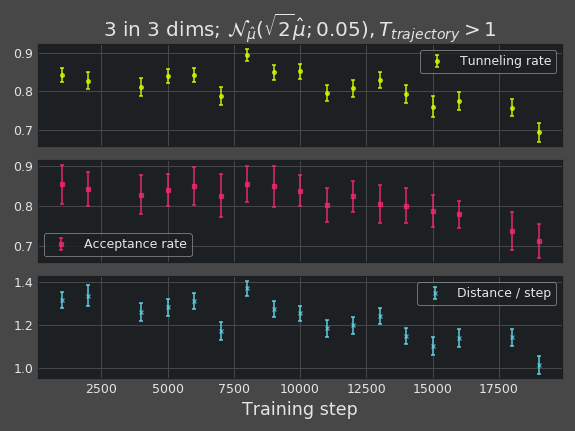

Saving figure to: ../log_mog_tf/run_209/figures1/tr_ar_dist_steps_highT.pdf


In [242]:
# for trajectories with temperature > 1 vs. STEP
out_file1 = out_file('tr_ar_dist_steps_highT')#, step)
kwargs1 = kwargs.copy()
kwargs1['title'] = title_highT
fig, ax = errorbar_plot(x_steps, y_data_highT, y_err_highT,
              out_file=out_file1, **kwargs1)

<IPython.core.display.Javascript object>


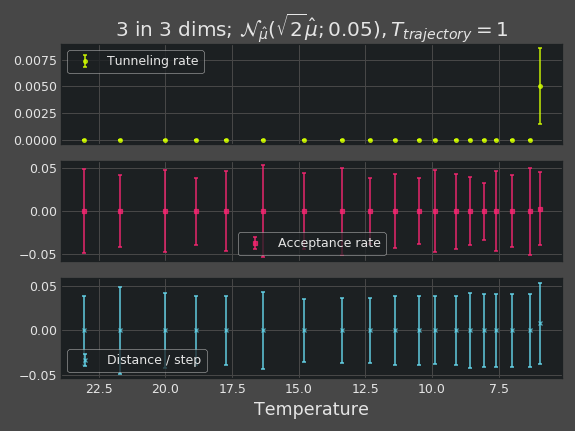

Saving figure to: ../log_mog_tf/run_209/figures1/tr_ar_dist_temps_lowT.pdf


In [255]:
out_file2 = out_file('tr_ar_dist_temps_lowT')#, step)
# for trajectories with temperature = 1. vs TEMP
kwargs2 = kwargs.copy()
kwargs2['x_label'] = 'Temperature'
kwargs2['title'] = title
kwargs2['reverse_x'] = True
fig, axes = errorbar_plot(x_temps, y_data, y_err,
                          out_file=out_file2, **kwargs2)
for ax in axes:
    ax.axvline(x=1, color='C3', ls=':', lw=2.)
#ax.set_xlim(15, 1.05)

<IPython.core.display.Javascript object>


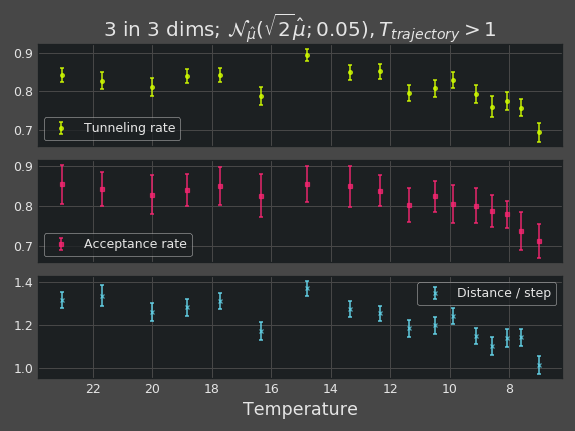

Saving figure to: ../log_mog_tf/run_209/figures1/tr_ar_dist_temps_highT.pdf


In [244]:
out_file3 = out_file('tr_ar_dist_temps_highT')#, step)
# for trajectories with temperature > 1. vs TEMP
kwargs3 = kwargs.copy()
kwargs3['title'] = title_highT
kwargs3['x_label'] = 'Temperature'
kwargs3['reverse_x'] = True
fig, ax = errorbar_plot(x_temps, y_data_highT, y_err_highT,
                        out_file=out_file3, **kwargs3)
for ax in axes:
    ax.axvline(x=1, color='C3', ls=':', lw=2.)
#ax.set_xlim(15, 1.05)

In [256]:
temp0 = 25
temp = temp0
steps = np.arange(20000)
annealing_factor = 0.98
annealing_steps = 300
tunneling_steps = 1000
fixed_temps = []
fixed_steps = []
for step in steps:
    if (step + 1) % annealing_steps == 0:
        tt  = temp * annealing_factor
        if tt > 1:
            temp = tt
    if (step + 1) % tunneling_steps == 0:
        fixed_steps.append(step)
        fixed_temps.append(temp)

<IPython.core.display.Javascript object>


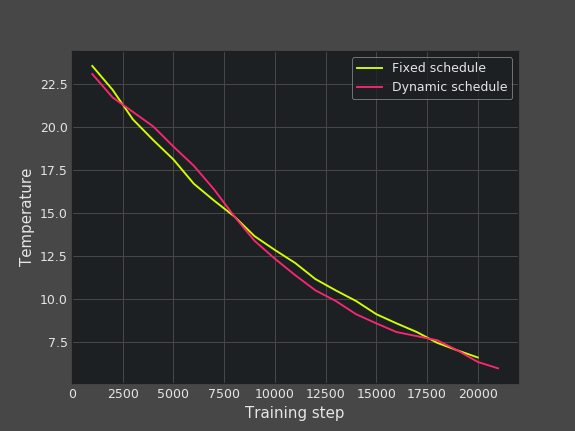

Text(0.5,0,'Training step')

Text(0,0.5,'Temperature')

In [257]:
fig, ax = plt.subplots()
ax.plot(fixed_steps, fixed_temps, label='Fixed schedule')
ax.plot(steps_arr, temp_arr, label='Dynamic schedule')
ax.set_xlabel('Training step')
ax.set_ylabel('Temperature')
ax.legend(loc='best')
plt.savefig(figs_dir + 'annealing_schedule.pdf', dpi=400, bbox_inches='tight')

In [262]:
for num in range(2, 10):
    print(f'Number: {num}')
    if num % 2 == 0:
        print(f'An even number: {num}')
        continue
    print(f'Found a num: {num}')

Number: 2
An even number: 2
Number: 3
Found a num: 3
Number: 4
An even number: 4
Number: 5
Found a num: 5
Number: 6
An even number: 6
Number: 7
Found a num: 7
Number: 8
An even number: 8
Number: 9
Found a num: 9


# OLD

<IPython.core.display.Javascript object>


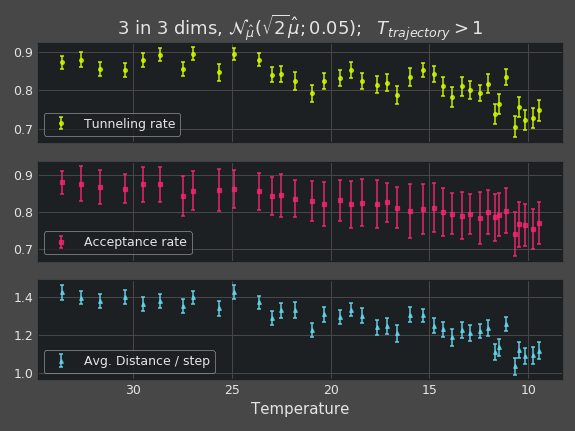

In [86]:
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')

fig, axes = plt.subplots(3, sharex=True)

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

eb = axes[0].errorbar(temp_arr, tunneling_rates_avg_highT, 
                      yerr=tunneling_rates_err_highT,
                      color='C0', marker='o', ls='', fillstyle='full',
                      markersize=3., label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[1].errorbar(temp_arr, acceptance_rates_avg_highT, 
                      yerr=acceptance_rates_err_highT,
                      color='C1', marker='s', ls='', fillstyle='full',
                      markersize=3., label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[2].errorbar(temp_arr, distances_avg_highT, yerr=distances_err_highT,
                       color='C2', marker='^', ls='', fillstyle='full',
                       markersize=3., label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[2].set_xlabel('Temperature', fontsize=12)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
xlim = axes[2].set_xlim(axes[1].get_xlim()[::-1])
grid = axes[0].grid(True)
grid = axes[1].grid(True)
grid = axes[2].grid(True)
#xt = axes[2].set_xticks(axes[2].get_xticks())
#xtl = axes[2].set_xticklabels(axes[2].get_xticklabels())
#xt =  axes[0].set_xticks([])
#xt = axes[1].set_xticks([])
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
legend = axes[2].legend(loc='best', fontsize=10)
fig.tight_layout()
#_ = plt.setp([a.get_xticklabels() for a in axes[:-1]], visible=False)
#_ = plt.setp([a.get_xticklabels() for a in axes[:-1]], visible=False)
fig.subplots_adjust(hspace=0.2)

out_file = figs_dir + 'tr_ar_dist_vs_temp_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


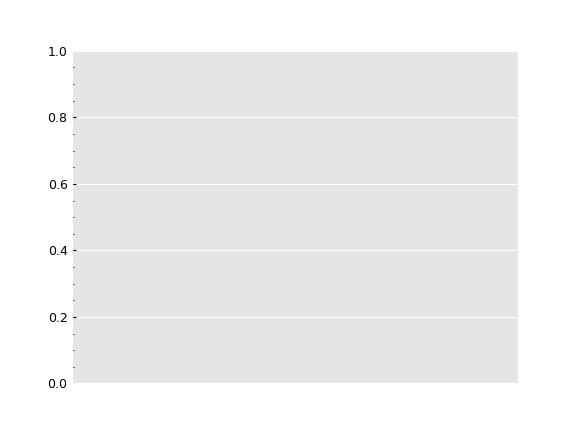

[]

In [56]:
fig, ax = plt.subplots()
ax.set_xticks([])

In [64]:
with open('../log_mog_tf/run202/run_info/_params.pkl', 'rb') as f:
    _params = pickle.load(f)
    

In [65]:
_params

{'x_dim': 3,
 'num_distributions': 3,
 'eps': 0.5,
 'scale': 0.1,
 'num_samples': 200,
 'means': array([[1.4142135, 0.       , 0.       ],
        [0.       , 1.4142135, 0.       ],
        [0.       , 0.       , 1.4142135]], dtype=float32),
 'sigma': 0.05,
 'small_pi': 2e-16,
 'lr_init': 0.01,
 'temp_init': 30,
 'annealing_steps': 250,
 'annealing_factor': 0.98,
 'num_training_steps': 30000,
 'tunneling_rate_steps': 1000,
 'save_steps': 1000,
 'lr_decay_steps': 2500,
 'lr_decay_rate': 0.96,
 'logging_steps': 100}

In [ ]:
xt.m

<IPython.core.display.Javascript object>


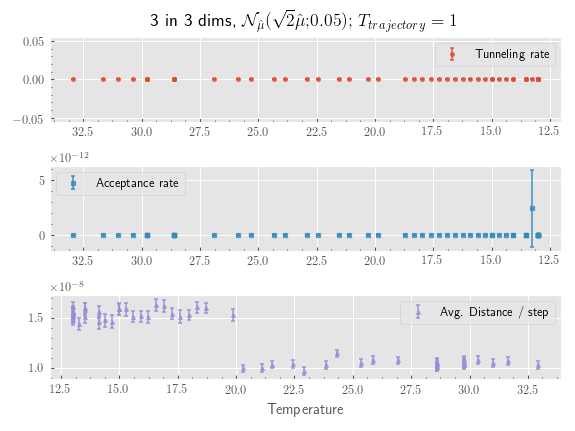

In [35]:
fig, axes = plt.subplots(3)
eb = axes[0].errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='', fillstyle='full',
                      markersize=3., label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[1].errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='', fillstyle='full',
                      markersize=3., label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[2].errorbar(temp_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='', fillstyle='full',
                       markersize=3., label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[2].set_xlabel('Temperature', fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
#axes[0].set_xscale("log")#, nonposx='clip')
#axes[1].set_xscale("log")#, nonposx='clip')
#axes[0].set_yscale("log")#, nonposx='clip')
#axes[1].set_yscale("log")#, nonposx='clip')
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
legend = axes[2].legend(loc='best', fontsize=10)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
xlim = axes[2].set_xlim(axes[1].get_xlim()[::-1])

#xlim = axes[0].set_xlim((8, 0.9))
#xlim = axes[1].set_xlim((8, 0.9))
#xlim = axes[1].set_xlim((8, 0.9))
grid = axes[0].grid(True)
grid = axes[1].grid(True)
grid = axes[2].grid(True)

fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_temp_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


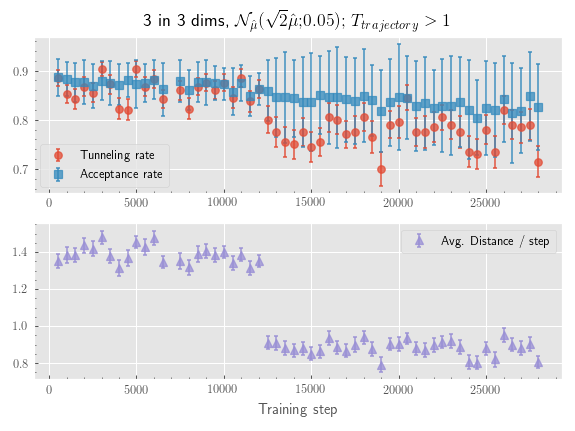

In [12]:
fig, axes = plt.subplots(3)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='', fillstyle='full',
                 markersize=3., label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[1].errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='', fillstyle='full',
                 markersize=3., label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[2].errorbar(steps_arr, distances_avg_highT, yerr=distances_err_highT,
                       color='C2', marker='^', ls='', fillstyle='full',
                       markersize=3., label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[2].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
grid = axes[2].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
legend = axes[2].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


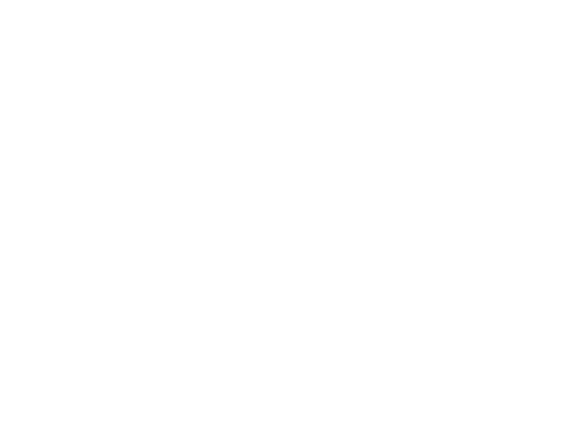

FileNotFoundError: [Errno 2] No such file or directory: '../log_mog_tf/run202/figures1/tr_ar_dist_vs_step_lowT.pdf'

In [76]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='', fillstyle='full',
                      markersize=3., label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='', fillstyle='full',
                      markersize=3., label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='', fillstyle='full',
                       markersize=3., label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


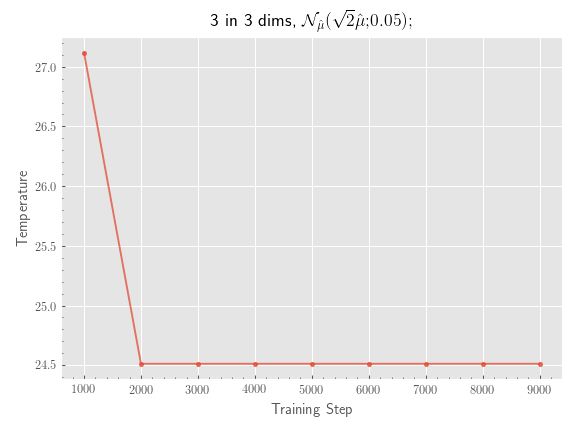

Text(0.5,0,'Training Step')

Text(0,0.5,'Temperature')

In [59]:
fig, ax = plt.subplots()
p = ax.plot(steps_arr, temp_arr, marker='.', ls='', fillstyle='full', alpha=0.75)
ax.set_xlabel('Training Step')
ax.set_ylabel('Temperature')

str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1# + r'$T_{trajectory} = 1$'
title = ax.set_title(title_str)#, fontsize=0)
grid = ax.grid(True)
fig.tight_layout()
out_file = figs_dir + 'temperature_vs_training_step.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

In [51]:
def f1(t0, rate, num_steps=None, func=None, *args):
    temp = t0
    temp_arr = [t0]
    count = 1
    while temp_arr[-1] > 1:
        if num_steps is not None:
            if count > num_steps:
                return temp_arr
        if func is None:
            tt = temp_arr[-1] * rate 
        else:
            tt = func(temp_arr[-1], rate, count, *args)
        temp_arr.append(max(1, tt))
        count += 1
    return temp_arr

In [52]:
def annealing_temps(t0, rate, func=None, *args):
    temp = t0
    temp_arr = [t0]
    count = 1
    while temp_arr[-1] > 1:
        if func is None:
            tt = temp_arr[-1] * rate 
        else:
            tt = func(count, *args)
        temp_arr.append(max(1, tt))
        count += 1
    return temp_arr
        
def exp_anneal(k, t0, rate):
    return t0 * np.exp(-k * rate)

def dynamic_rate_anneal(k, t0, rate0, rate):
    new_rate = rate0 * (rate ** k)
    return t0 * (new_rate ** k)

def optimal_anneal(k, t0, dimension):
    return t0 * ((np.sqrt(dimension) - 1) ** k)

In [53]:
alpha0 = 0.98
y0 = annealing_temps(t0, alpha0)

NameError: name 't0' is not defined

In [ ]:
l2 = 0.02
y2 = annealing_temps(t0, l2, exp_anneal, *[t0, l2])

In [ ]:
dimension = 5 
y3 = annealing_temps(t0, l3, optimal_anneal, *[t0, dimension])

In [ ]:
alpha1 = 1 - 1E-5
y4 = annealing_temps(t0, alpha0, dynamic_rate_anneal, *[t0, alpha0, alpha1])

In [ ]:
len(y1), len(y2), len(y3), len(y4)

In [ ]:
f1??

In [ ]:
plt.style.use('fivethirtyeight')

s1 = r'''$T_{k+1} = \alpha T_{k}, \,\,\alpha = 0.98$'''
s2 = r'''$T(k) = T_0 e^{-\lambda k},\,\, \lambda = 5e-4$'''
s3 = r'''$ T_{k+1} = (\sqrt(N) - 1) T_{k}, \,\,\, N = 3$'''
s4 = (r'''$T_{k+1} = (\alpha_0)^{\alpha_1 k} T_k,$''' 
      + r'''$\,\,\alpha_0 = 0.98, \alpha_1=1-1E-4$''')

fig, ax = plt.subplots()
p1 = ax.plot(np.arange(len(y1)), y1, markersize=3., label=s1)
p2 = ax.plot(np.arange(len(y2)), y2, markersize=3., label=s2)
p3 = ax.plot(np.arange(len(y3)), y3, markersize=3., label=s3)
p4 = ax.plot(np.arange(len(y4)), y4, markersize=3., label=s4)
ax.set_xlabel('$k$')
#ax.set_yscale("log")#, nonposx='clip')
#ax.set_xscale("log")#, nonposx='clip')
#max_iters = max(len(y1), len(y2), len(y4))
#ax.set_xlim((100, max_iters+3))
leg = ax.legend(loc='best', fontsize=12)

In [ ]:
#def f0(t0, rate, k):
#    temp_arr = [t0]
#    next_t = t0 * (rate ** (k+1))
#    while next_t > 1:
#        temp_arr.append(next_t)
#        return f0(t0, rate, k+1)
#    return 1

In [ ]:
y2[:10], y3[:10]

In [ ]:
def f_exp(t0, rate, k):
    return max(1, t0 * np.exp(-rate * k))

def f_const(t0, rate, k):
    return max(1, t0 * (rate ** k))

In [ ]:
t0 = 30
rate = 0.98
k0 = 1
y0 = [t0]
def annealing_temps(t0, rate, func):
    k = 1
    arr = []
    while func(t0, rate, k) > 1:
        arr.append(f_exp(t0, rate, k))
        k += 1
    return arr

y_exp = annealing_temps(t0, rate, f_exp)
y_const = annealing_temps(t0, rate, f_const)

In [ ]:
y_exp

In [ ]:
len(y1)